In [1]:
!pip install imbalanced-learn

In [2]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 88.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.


In [3]:
!pip install scikeras

In [4]:
!pip install tensorflow scikeras

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

df = pd.read_csv("pd_speech_features.csv", header=1)
df = df.drop('id', axis=1)

df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (604, 753)
Shape of X_test: (152, 753)
Shape of y_train: (604,)
Shape of y_test: (152,)


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
  ])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
predictions



array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [18]:
from sklearn.svm import SVC


svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
    ])

svm_pipeline.fit(X_train, y_train)
svm_predictions = svm_pipeline.predict(X_test)
svm_predictions

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [19]:
import tensorflow as tf
from tensorflow import keras
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier

def create_nn_model(shape):
    model = keras.Sequential([
        keras.layers.InputLayer(shape=shape),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


input_shape = (X_train.shape[1],)

nn_pipeline_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', KerasClassifier(model=create_nn_model(input_shape), epochs=10, batch_size=32, verbose=0))
])

In [20]:
nn_pipeline_scaled.fit(X_train, y_train)
nn_predictions = nn_pipeline_scaled.predict(X_test)
nn_predictions

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

logreg_accuracy = accuracy_score(y_test, predictions)
logreg_precision = precision_score(y_test, predictions)
logreg_recall = recall_score(y_test, predictions)
logreg_f1 = f1_score(y_test, predictions)
logreg_cm = confusion_matrix(y_test, predictions)

print("Logistic Regression Metrics:")
print(f"Accuracy: {logreg_accuracy:.4f}")
print(f"Precision: {logreg_precision:.4f}")
print(f"Recall: {logreg_recall:.4f}")
print(f"F1 Score: {logreg_f1:.4f}")
print("Confusion Matrix:")
print(logreg_cm)
print("-" * 30)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)

print("SVM Metrics:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1 Score: {svm_f1:.4f}")
print("Confusion Matrix:")
print(svm_cm)
print("-" * 30)


nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_precision = precision_score(y_test, nn_predictions)
nn_recall = recall_score(y_test, nn_predictions)
nn_f1 = f1_score(y_test, nn_predictions)
nn_cm = confusion_matrix(y_test, nn_predictions)

print("Neural Network Metrics:")
print(f"Accuracy: {nn_accuracy:.4f}")
print(f"Precision: {nn_precision:.4f}")
print(f"Recall: {nn_recall:.4f}")
print(f"F1 Score: {nn_f1:.4f}")
print("Confusion Matrix:")
print(nn_cm)
print("-" * 30)


Logistic Regression Metrics:
Accuracy: 0.8618
Precision: 0.8908
Recall: 0.9298
F1 Score: 0.9099
Confusion Matrix:
[[ 25  13]
 [  8 106]]
------------------------------
SVM Metrics:
Accuracy: 0.8553
Precision: 0.8898
Recall: 0.9211
F1 Score: 0.9052
Confusion Matrix:
[[ 25  13]
 [  9 105]]
------------------------------
Neural Network Metrics:
Accuracy: 0.8750
Precision: 0.8862
Recall: 0.9561
F1 Score: 0.9198
Confusion Matrix:
[[ 24  14]
 [  5 109]]
------------------------------


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

df = pd.read_csv("pd_speech_features.csv", header=1)
df = df.drop('id', axis=1)

df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (604, 753)
Shape of X_test: (152, 753)
Shape of y_train: (604,)
Shape of y_test: (152,)


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
  ])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
predictions

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [24]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
#0.60

print("Training set shape before SMOTE: ", Counter(y_train))

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("Training set shape after SMOTE: ", Counter(y_res))

Training set shape before SMOTE:  Counter({1: 450, 0: 154})
Training set shape after SMOTE:  Counter({1: 450, 0: 450})


In [25]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
#0.63
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print(f"Training set shape after oversampling: {Counter(y_resampled)}")

Training set shape after oversampling: Counter({1: 450, 0: 450})


In [26]:
from sklearn.svm import SVC
#0.657
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf',  class_weight='balanced'))
    ])
#---here write in implementation
svm_pipeline.fit(X_train, y_train)
svm_predictions = svm_pipeline.predict(X_test)
svm_predictions

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [27]:
import tensorflow as tf
from tensorflow import keras
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier

def create_nn_model(shape):
    model = keras.Sequential([
        keras.layers.InputLayer(shape=shape),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


input_shape = (X_train.shape[1],)

nn_pipeline_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', KerasClassifier(model=create_nn_model(input_shape), epochs=10, batch_size=32, verbose=0))
])


In [28]:
nn_pipeline_scaled.fit(X_train, y_train)
nn_predictions = nn_pipeline_scaled.predict(X_test)
nn_predictions

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

logreg_accuracy = accuracy_score(y_test, predictions)
logreg_precision = precision_score(y_test, predictions)
logreg_recall = recall_score(y_test, predictions)
logreg_recall_neg = recall_score(y_test, predictions, pos_label=0)
logreg_f1 = f1_score(y_test, predictions)
logreg_cm = confusion_matrix(y_test, predictions)

print("Logistic Regression Metrics:")
print(f"Accuracy: {logreg_accuracy:.4f}")
print(f"Precision: {logreg_precision:.4f}")
print(f"Recall: {logreg_recall:.4f}")
print(f"Recall neg: {logreg_recall_neg:.4f}")
print(f"F1 Score: {logreg_f1:.4f}")
print("Confusion Matrix:")
print(logreg_cm)
print("-" * 30)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_recall_neg = recall_score(y_test, svm_predictions, pos_label=0)
svm_f1 = f1_score(y_test, svm_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)

print("SVM Metrics:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"Recall neg: {svm_recall_neg:.4f}")
print(f"F1 Score: {svm_f1:.4f}")
print("Confusion Matrix:")
print(svm_cm)
print("-" * 30)


nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_precision = precision_score(y_test, nn_predictions)
nn_recall = recall_score(y_test, nn_predictions)
nn_recall_neg = recall_score(y_test, nn_predictions, pos_label=0)
nn_f1 = f1_score(y_test, nn_predictions)
nn_cm = confusion_matrix(y_test, nn_predictions)

print("Neural Network Metrics:")
print(f"Accuracy: {nn_accuracy:.4f}")
print(f"Precision: {nn_precision:.4f}")
print(f"Recall: {nn_recall:.4f}")
print(f"Recall neg: {nn_recall_neg:.4f}")
print(f"F1 Score: {nn_f1:.4f}")
print("Confusion Matrix:")
print(nn_cm)
print("-" * 30)

Logistic Regression Metrics:
Accuracy: 0.8618
Precision: 0.8908
Recall: 0.9298
Recall neg: 0.6579
F1 Score: 0.9099
Confusion Matrix:
[[ 25  13]
 [  8 106]]
------------------------------
SVM Metrics:
Accuracy: 0.8289
Precision: 0.8793
Recall: 0.8947
Recall neg: 0.6316
F1 Score: 0.8870
Confusion Matrix:
[[ 24  14]
 [ 12 102]]
------------------------------
Neural Network Metrics:
Accuracy: 0.8947
Precision: 0.9016
Recall: 0.9649
Recall neg: 0.6842
F1 Score: 0.9322
Confusion Matrix:
[[ 26  12]
 [  4 110]]
------------------------------


In [ ]:
#display(feature_evaluation_df.sort_values(by='Recall (Neg)', ascending=False))

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Feature groups
feature_groups = {
    "Baseline": X.columns[0:21],
    "Intensity": X.columns[21:24],
    "Formant": X.columns[24:28],
    "Bandwidth": X.columns[28:32],
    "VocalFold": X.columns[32:54],
    "MFCC": X.columns[54:138],
    "Wavelet": X.columns[138:320],
    "TQWT": X.columns[320:752],
}

# Step 1: PCA per group
group_pca_tables = {}
for group_name, cols in feature_groups.items():
    X_group = X[cols]
    X_scaled = StandardScaler().fit_transform(X_group)

    # Keep all components for now
    pca = PCA(n_components=None)
    X_pca = pca.fit_transform(X_scaled)

    # Store all PCs for this group
    group_pca_tables[group_name] = pd.DataFrame(
        X_pca, columns=[f"{group_name}_PC{i+1}" for i in range(X_pca.shape[1])]
    )

# Step 2: Combine all group PCs
combined_pcs = pd.concat(group_pca_tables.values(), axis=1)

# Step 3: PCA again on combined PCs to select 90% of total variance
scaler_combined = StandardScaler()
combined_scaled = scaler_combined.fit_transform(combined_pcs)

pca_final = PCA(n_components=None)
pca_final.fit(combined_scaled)

cumulative_variance = np.cumsum(pca_final.explained_variance_ratio_)
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print("Number of components to cover 90% variance:", n_components_90)

# Transform to final dataset
X_final = pca_final.transform(combined_scaled)[:, :n_components_90]
df_final = pd.DataFrame(X_final, columns=[f"Final_PC{i+1}" for i in range(n_components_90)])
df_final.head()


Number of components to cover 90% variance: 423


,Final_PC1,Final_PC2,Final_PC3,Final_PC4,Final_PC5,Final_PC6,Final_PC7,Final_PC8,Final_PC9,Final_PC10,...,Final_PC414,Final_PC415,Final_PC416,Final_PC417,Final_PC418,Final_PC419,Final_PC420,Final_PC421,Final_PC422,Final_PC423
0,-0.880112,1.965511,2.195504,-0.927933,0.387348,1.506208,1.715693,0.625612,0.287690,-0.513301,...,-0.708496,-0.300261,-0.093862,0.686687,-0.726314,-0.173707,-0.022396,0.674863,-0.159614,0.319682
1,-0.839474,0.945695,2.629672,-1.168412,0.490619,1.092448,1.769587,1.583503,-0.113576,1.050971,...,-0.371370,0.971012,-1.377207,-0.230201,1.133590,-0.098388,0.216888,-0.029350,0.460108,-0.090007
2,-1.747775,1.075373,1.862807,-1.709087,0.465344,1.706144,0.844305,2.092244,-0.724194,-0.338840,...,0.524462,-0.318077,0.463975,-0.050484,0.068039,-1.509771,0.358257,1.015906,0.841821,0.369447
3,-1.413092,2.461435,-1.812973,0.714487,1.255542,0.028510,3.950218,7.928109,-1.432081,0.253295,...,0.077942,-0.015219,-0.002462,0.017760,0.021540,0.076015,-0.017349,-0.016135,-0.050337,-0.000573
4,-0.259280,1.895573,-2.337409,1.718941,0.930180,-3.586409,4.267411,5.654653,-2.346492,-0.460855,...,0.008177,0.054235,-0.008672,0.037027,-0.083032,-0.044206,0.037522,-0.006887,0.042641,-0.048046


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Scale all features
X_scaled = StandardScaler().fit_transform(X)  # X = all features

# Fit PCA with all components
pca_all = PCA(n_components=None)
pca_all.fit(X_scaled)

# Cumulative explained variance
cumulative_variance_all = np.cumsum(pca_all.explained_variance_ratio_)

# Number of components covering 90% variance
n_components_90_all = np.argmax(cumulative_variance_all >= 0.90) + 1
print("Number of components to cover 90% variance (all features PCA):", n_components_90_all)

# Transform data using selected components
X_pca_all = pca_all.transform(X_scaled)[:, :n_components_90_all]

# Convert to DataFrame
df_pca_all = pd.DataFrame(X_pca_all, columns=[f"PC{i+1}" for i in range(n_components_90_all)])
df_pca_all.head()


Number of components to cover 90% variance (all features PCA): 117


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117
0,10.034309,1.473186,-6.836298,0.809853,-3.405661,-0.033693,-1.994512,0.925260,0.458790,0.473160,...,-0.788305,-0.211858,0.248191,1.017413,0.311990,-0.744334,0.854544,-0.094961,-0.678987,1.156155
1,10.624667,1.585847,-6.820881,-1.390104,-3.174823,1.742995,-2.147863,2.229634,0.631808,-1.247580,...,-0.672420,0.904925,1.176429,0.711343,0.072423,0.032228,-0.453671,-1.131410,0.233455,0.201913
2,13.503155,-1.251541,-6.809195,-1.388726,-2.259068,2.590965,-0.756006,1.071568,0.112940,1.542235,...,-0.853446,-0.478359,1.283417,1.484256,0.451408,-1.236100,0.195648,-0.674014,0.326669,0.880571
3,9.143503,8.834664,15.302887,4.081097,-5.063204,-9.536942,2.908443,-5.220640,-4.779849,-5.203670,...,0.128071,-1.180121,-0.646050,1.283288,0.412383,0.882444,0.517531,0.701690,0.359307,-2.637220
4,6.752753,4.612583,15.649159,5.895137,-5.710882,-11.018595,1.299189,-5.402774,-7.902122,-7.289489,...,0.471203,0.139066,-1.051944,0.238972,1.084773,0.457404,0.786018,0.420752,0.960705,1.045702


In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split PCA data (two-step PCA)
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(df_final, y, test_size=0.2, random_state=42)

# Split PCA data (all-features PCA)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(df_pca_all, y, test_size=0.2, random_state=42)

def evaluate_svm(X_train, X_test, y_train, y_test):
    svm_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', class_weight='balanced'))
    ])
    svm_pipeline.fit(X_train, y_train)
    preds = svm_pipeline.predict(X_test)

    metrics = {
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds),
        'Recall': recall_score(y_test, preds),
        'Recall_neg': recall_score(y_test, preds, pos_label=0),
        'F1': f1_score(y_test, preds),
        'Confusion_Matrix': confusion_matrix(y_test, preds)
    }
    return metrics

# Evaluate two-step PCA
metrics_two = evaluate_svm(X_train_two, X_test_two, y_train_two, y_test_two)
print("SVM Metrics (Two-step PCA):")
for k, v in metrics_two.items():
    print(f"{k}: {v}")
print("-" * 30)

# Evaluate all-features PCA
metrics_all = evaluate_svm(X_train_all, X_test_all, y_train_all, y_test_all)
print("SVM Metrics (All-features PCA):")
for k, v in metrics_all.items():
    print(f"{k}: {v}")


SVM Metrics (Two-step PCA):
Accuracy: 0.7763157894736842
Precision: 0.773972602739726
Recall: 0.9912280701754386
Recall_neg: 0.13157894736842105
F1: 0.8692307692307693
Confusion_Matrix: [[  5  33]
 [  1 113]]
------------------------------
SVM Metrics (All-features PCA):
Accuracy: 0.8289473684210527
Precision: 0.8492063492063492
Recall: 0.9385964912280702
Recall_neg: 0.5
F1: 0.8916666666666667
Confusion_Matrix: [[ 19  19]
 [  7 107]]


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest feature selection
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

threshold = np.percentile(importances, 96.015)
top_features = feat_df[feat_df['Importance'] > threshold]['Feature'].tolist()
print(f"Selected top {len(top_features)} features:", top_features)

# Reduce dataset to top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Train SVM on selected features
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', class_weight='balanced'))
])

svm_pipeline.fit(X_train_top, y_train)
svm_predictions = svm_pipeline.predict(X_test_top)

Selected top 30 features: ['mean_MFCC_2nd_coef', 'std_Log_energy', 'std_delta_log_energy', 'std_6th_delta', 'std_7th_delta', 'std_9th_delta', 'std_10th_delta', 'std_delta_delta_log_energy', 'std_4th_delta_delta', 'std_6th_delta_delta', 'std_7th_delta_delta', 'std_8th_delta_delta', 'std_9th_delta_delta', 'std_10th_delta_delta', 'std_11th_delta_delta', 'app_LT_TKEO_mean_5_coef', 'tqwt_entropy_log_dec_6', 'tqwt_entropy_log_dec_11', 'tqwt_entropy_log_dec_12', 'tqwt_entropy_log_dec_13', 'tqwt_TKEO_mean_dec_6', 'tqwt_TKEO_mean_dec_12', 'tqwt_TKEO_std_dec_12', 'tqwt_meanValue_dec_36', 'tqwt_stdValue_dec_6', 'tqwt_stdValue_dec_13', 'tqwt_stdValue_dec_19', 'tqwt_kurtosisValue_dec_17', 'tqwt_kurtosisValue_dec_18', 'tqwt_kurtosisValue_dec_36']


In [34]:
# Calculate metrics
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_recall_neg = recall_score(y_test, svm_predictions, pos_label=0)
svm_f1 = f1_score(y_test, svm_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)

print("SVM Metrics:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"Recall neg: {svm_recall_neg:.4f}")
print(f"F1 Score: {svm_f1:.4f}")
print("Confusion Matrix:")
print(svm_cm)
print("-" * 30)

# Recall per class
recall_per_class = recall_score(y_test, svm_predictions, labels=[0,1], average=None)
print(f"Recall Class 0: {recall_per_class[0]:.4f}, Recall Class 1: {recall_per_class[1]:.4f}")

SVM Metrics:
Accuracy: 0.8289
Precision: 0.9074
Recall: 0.8596
Recall neg: 0.7368
F1 Score: 0.8829
Confusion Matrix:
[[28 10]
 [16 98]]
------------------------------
Recall Class 0: 0.7368, Recall Class 1: 0.8596


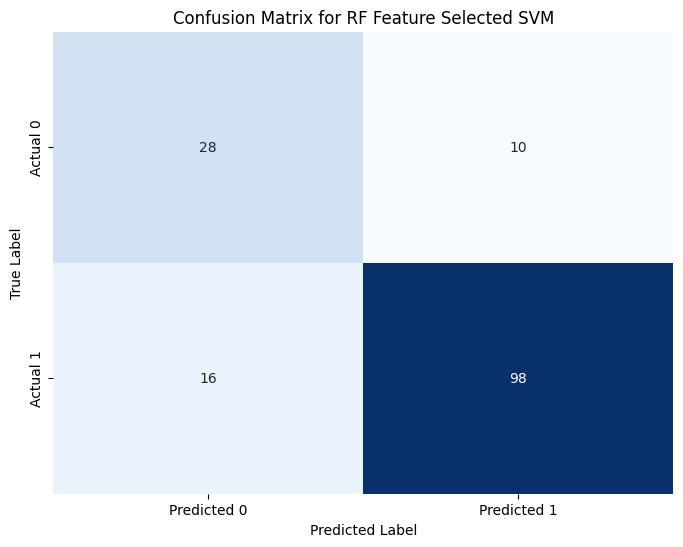


Classification Report for RF Feature Selected SVM:
              precision    recall  f1-score   support

           0       0.64      0.74      0.68        38
           1       0.91      0.86      0.88       114

    accuracy                           0.83       152
   macro avg       0.77      0.80      0.78       152
weighted avg       0.84      0.83      0.83       152



In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for RF Feature Selected SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("\nClassification Report for RF Feature Selected SVM:")
print(classification_report(y_test, svm_predictions))

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Start with all feature names
current_features = list(X.columns)

# Number of iterations
num_iterations = 241
features_to_remove_per_iteration = 3

print(f"Iteratively removing the top {features_to_remove_per_iteration} features based on Recall (Neg) and evaluating SVM performance.")

for iteration in range(num_iterations):
    print(f"\n--- Iteration {iteration + 1}/{num_iterations} ---")
    print(f"Number of features currently used: {len(current_features)}")

    if len(current_features) <= features_to_remove_per_iteration:
        print("Not enough features left to remove. Stopping iteration.")
        break

    accuracy_scores_iter = []
    precision_scores_iter = []
    recall_scores_iter = []
    recall_neg_scores_iter = []
    f1_scores_iter = []
    feature_names_evaluated_iter = []

    # Evaluate by leaving one of the current features out
    for feature_to_exclude in current_features:
        features_to_use = [col for col in current_features if col != feature_to_exclude]
        X_subset = X[features_to_use]

        # Split data for this feature subset
        X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(
            X_subset, y, test_size=0.2, random_state=42
        )

        # Create and train the SVM pipeline
        svm_pipeline_feature_out = Pipeline([
            ('scaler', StandardScaler()),
            ('svm', SVC(kernel='rbf', class_weight='balanced'))
        ])
        svm_pipeline_feature_out.fit(X_train_subset, y_train_subset)

        # Make predictions
        predictions_feature_out = svm_pipeline_feature_out.predict(X_test_subset)

        # Calculate and store metrics
        accuracy_scores_iter.append(accuracy_score(y_test_subset, predictions_feature_out))
        precision_scores_iter.append(precision_score(y_test_subset, predictions_feature_out, zero_division=0))
        recall_scores_iter.append(recall_score(y_test_subset, predictions_feature_out, zero_division=0))
        recall_neg_scores_iter.append(recall_score(y_test_subset, predictions_feature_out, pos_label=0, zero_division=0))
        f1_scores_iter.append(f1_score(y_test_subset, predictions_feature_out, zero_division=0))
        feature_names_evaluated_iter.append(feature_to_exclude)

    # Create a DataFrame for the current iteration's evaluation
    feature_evaluation_df_iter = pd.DataFrame({
        'Feature Excluded': feature_names_evaluated_iter,
        'Accuracy': accuracy_scores_iter,
        'Precision': precision_scores_iter,
        'Recall': recall_scores_iter,
        'Recall (Neg)': recall_neg_scores_iter,
        'F1 Score': f1_scores_iter
    })

    # Sort by 'Recall (Neg)'
    sorted_evaluation = feature_evaluation_df_iter.sort_values(by='Recall (Neg)', ascending=True)

    features_to_remove_this_iter = sorted_evaluation['Feature Excluded'].tail(features_to_remove_per_iteration).tolist()
    print(f"Features to remove in the next iteration: {features_to_remove_this_iter}")

    current_features = [f for f in current_features if f not in features_to_remove_this_iter]


print("\nIterative feature removal process finished.")
print(f"Final number of features remaining: {len(current_features)}")
print(f"Final features remaining: {current_features}")

print("\nEvaluating SVM with the final set of features:")
if len(current_features) > 0:
    X_final_subset = X[current_features]
    X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
        X_final_subset, y, test_size=0.2, random_state=42
    )

    svm_pipeline_final = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', class_weight='balanced'))
    ])
    svm_pipeline_final.fit(X_train_final, y_train_final)
    predictions_final = svm_pipeline_final.predict(X_test_final)

    final_accuracy = accuracy_score(y_test_final, predictions_final)
    final_precision = precision_score(y_test_final, predictions_final, zero_division=0)
    final_recall = recall_score(y_test_final, predictions_final, zero_division=0)
    final_recall_neg = recall_score(y_test_final, predictions_final, pos_label=0, zero_division=0)
    final_f1 = f1_score(y_test_final, predictions_final, zero_division=0)
    final_cm = confusion_matrix(y_test_final, predictions_final, labels=[0, 1])


    print("Final SVM Metrics:")
    print(f"Accuracy: {final_accuracy:.4f}")
    print(f"Precision: {final_precision:.4f}")
    print(f"Recall: {final_recall:.4f}")
    print(f"Recall neg: {final_recall_neg:.4f}")
    print(f"F1 Score: {final_f1:.4f}")
    print("Confusion Matrix:")
    print(final_cm)

else:
    print("No features remaining to train the model.")

# This is the result of running the code in the above cell
# This is the result of runnning the code in the cell
"""features = ['tqwt_entropy_log_dec_1',
'std_delta_delta_log_energy',
'tqwt_medianValue_dec_24',
'tqwt_medianValue_dec_5',
'tqwt_energy_dec_25',
'mean_MFCC_7th_coef',
'det_LT_entropy_log_4_coef',
'det_LT_entropy_log_5_coef',
'tqwt_kurtosisValue_dec_23',
'tqwt_kurtosisValue_dec_35',
'tqwt_kurtosisValue_dec_36',
'gender',
'det_LT_entropy_log_6_coef',
'tqwt_medianValue_dec_16',
'mean_8th_delta_delta',
'apq11Shimmer',
'tqwt_kurtosisValue_dec_34',
'PPE',
'tqwt_kurtosisValue_dec_32',
'tqwt_kurtosisValue_dec_33',
'DFA',
'tqwt_kurtosisValue_dec_30',
'tqwt_kurtosisValue_dec_31',
'RPDE',
'tqwt_kurtosisValue_dec_28',
'tqwt_kurtosisValue_dec_29',
'numPulses',
'tqwt_kurtosisValue_dec_26',
'tqwt_kurtosisValue_dec_27',
'numPeriodsPulses',
'tqwt_kurtosisValue_dec_24',
'tqwt_kurtosisValue_dec_25',
'meanPeriodPulses',
'f2',
'f1',
'meanIntensity',
'b4',
'GNE_NSR_SEO',
'GQ_std_cycle_open',
'tqwt_kurtosisValue_dec_21',
'tqwt_kurtosisValue_dec_22',
'stdDevPeriodPulses',
'tqwt_kurtosisValue_dec_19',
'tqwt_kurtosisValue_dec_20',
'locPctJitter',
'tqwt_kurtosisValue_dec_17',
'tqwt_kurtosisValue_dec_18',
'locAbsJitter',
'b3',
'b2',
'rapJitter',
'tqwt_kurtosisValue_dec_15',
'tqwt_kurtosisValue_dec_16',
'ppq5Jitter',
'tqwt_kurtosisValue_dec_13',
'tqwt_kurtosisValue_dec_14',
'ddpJitter',
'tqwt_kurtosisValue_dec_11',
'tqwt_kurtosisValue_dec_12',
'locShimmer',
'tqwt_kurtosisValue_dec_9',
'tqwt_kurtosisValue_dec_10',
'locDbShimmer',
'GNE_SNR_SEO',
'tqwt_kurtosisValue_dec_8',
'apq3Shimmer',
'tqwt_kurtosisValue_dec_6',
'tqwt_kurtosisValue_dec_7',
'apq5Shimmer',
'tqwt_kurtosisValue_dec_4',
'tqwt_kurtosisValue_dec_5',
'ddaShimmer',
'meanHarmToNoiseHarmonicity',
'tqwt_kurtosisValue_dec_3',
'meanNoiseToHarmHarmonicity',
'tqwt_kurtosisValue_dec_1',
'tqwt_kurtosisValue_dec_2',
'meanAutoCorrHarmonicity',
'tqwt_skewnessValue_dec_29',
'minIntensity',
'tqwt_skewnessValue_dec_30',
'IMF_SNR_TKEO',
'IMF_SNR_SEO',
'VFER_NSR_SEO',
'tqwt_skewnessValue_dec_35',
'tqwt_skewnessValue_dec_36',
'maxIntensity',
'tqwt_skewnessValue_dec_33',
'tqwt_skewnessValue_dec_34',
'f3',
'tqwt_skewnessValue_dec_31',
'tqwt_skewnessValue_dec_32',
'f4',
'tqwt_maxValue_dec_25',
'tqwt_TKEO_std_dec_25',
'tqwt_stdValue_dec_25',
'mean_Log_energy',
'IMF_NSR_entropy',
'b1',
'tqwt_skewnessValue_dec_27',
'tqwt_skewnessValue_dec_28',
'GQ_prc5_95',
'mean_2nd_delta',
'mean_11th_delta',
'mean_MFCC_6th_coef',
'mean_3rd_delta_delta',
'mean_5th_delta_delta',
'tqwt_meanValue_dec_26',
'tqwt_skewnessValue_dec_25',
'tqwt_skewnessValue_dec_26',
'GQ_std_cycle_closed',
'mean_MFCC_3rd_coef',
'tqwt_skewnessValue_dec_24',
'GNE_mean',
'tqwt_skewnessValue_dec_22',
'tqwt_skewnessValue_dec_23',
'GNE_std',
'tqwt_skewnessValue_dec_20',
'tqwt_skewnessValue_dec_21',
'VFER_mean',
'tqwt_skewnessValue_dec_18',
'tqwt_skewnessValue_dec_19',
'VFER_std',
'tqwt_skewnessValue_dec_16',
'tqwt_skewnessValue_dec_17',
'GNE_SNR_TKEO',
'mean_MFCC_12th_coef',
'tqwt_skewnessValue_dec_15',
'VFER_entropy',
'mean_1st_delta',
'mean_0th_delta',
'mean_delta_log_energy',
'tqwt_skewnessValue_dec_13',
'tqwt_skewnessValue_dec_14',
'GNE_NSR_TKEO',
'IMF_NSR_TKEO',
'VFER_SNR_SEO',
'VFER_SNR_TKEO',
'tqwt_skewnessValue_dec_11',
'tqwt_skewnessValue_dec_12',
'VFER_NSR_TKEO',
'tqwt_skewnessValue_dec_9',
'tqwt_skewnessValue_dec_10',
'IMF_SNR_entropy',
'mean_10th_delta',
'mean_9th_delta',
'IMF_NSR_SEO',
'tqwt_skewnessValue_dec_7',
'tqwt_skewnessValue_dec_8',
'mean_MFCC_0th_coef',
'tqwt_skewnessValue_dec_5',
'tqwt_skewnessValue_dec_6',
'mean_MFCC_1st_coef',
'tqwt_skewnessValue_dec_3',
'tqwt_skewnessValue_dec_4',
'mean_MFCC_2nd_coef',
'tqwt_skewnessValue_dec_1',
'tqwt_skewnessValue_dec_2',
'mean_MFCC_4th_coef',
'mean_4th_delta_delta',
'tqwt_maxValue_dec_36',
'mean_MFCC_5th_coef',
'tqwt_maxValue_dec_34',
'tqwt_maxValue_dec_35',
'mean_MFCC_8th_coef',
'tqwt_maxValue_dec_32',
'tqwt_maxValue_dec_33',
'mean_MFCC_9th_coef',
'tqwt_maxValue_dec_30',
'tqwt_maxValue_dec_31',
'mean_MFCC_10th_coef',
'tqwt_maxValue_dec_28',
'tqwt_maxValue_dec_29',
'mean_MFCC_11th_coef',
'tqwt_maxValue_dec_26',
'tqwt_maxValue_dec_27',
'mean_3rd_delta',
'std_MFCC_1st_coef',
'std_MFCC_0th_coef',
'std_Log_energy',
'tqwt_maxValue_dec_23',
'tqwt_maxValue_dec_24',
'mean_4th_delta',
'tqwt_maxValue_dec_21',
'tqwt_maxValue_dec_22',
'mean_5th_delta',
'tqwt_maxValue_dec_19',
'tqwt_maxValue_dec_20',
'mean_6th_delta',
'tqwt_maxValue_dec_17',
'tqwt_maxValue_dec_18',
'mean_7th_delta',
'std_MFCC_7th_coef',
'std_MFCC_6th_coef',
'mean_8th_delta',
'tqwt_maxValue_dec_15',
'tqwt_maxValue_dec_16',
'mean_12th_delta',
'tqwt_maxValue_dec_13',
'tqwt_maxValue_dec_14',
'mean_delta_delta_log_energy',
'tqwt_maxValue_dec_11',
'tqwt_maxValue_dec_12',
'mean_delta_delta_0th',
'tqwt_maxValue_dec_9',
'tqwt_maxValue_dec_10',
'mean_1st_delta_delta',
'std_delta_log_energy',
'tqwt_maxValue_dec_8',
'mean_2nd_delta_delta',
'tqwt_maxValue_dec_6',
'tqwt_maxValue_dec_7',
'mean_6th_delta_delta',
'tqwt_maxValue_dec_4',
'tqwt_maxValue_dec_5',
'mean_7th_delta_delta',
'tqwt_maxValue_dec_2',
'tqwt_maxValue_dec_3',
'mean_9th_delta_delta',
'tqwt_minValue_dec_36',
'tqwt_maxValue_dec_1',
'mean_10th_delta_delta',
'tqwt_minValue_dec_34',
'tqwt_minValue_dec_35',
'mean_11th_delta_delta']"""